# 背景

>电信服务是生活中常见的消费服务，在现代社会，凡是使用手机打电话，或者在家看电视，都必须通过电信运营商提供的通话、网络等服务才能实现。但如今高居不下的获客成本让电信运营商遭遇“天花板”，甚至陷入获客难的窘境。关于用户留存有这样一个观点，如果将用户流失率降低5%，公司利润将提升25%-85%。所以随着市场饱和度上升，电信运营商亟待解决增加用户黏性，延长用户生命周期的问题。正因为如此，电信用户流失分析与预测至关重要。

>本文采用来自kaggle平台的电信客户数据集，来分析人们对电信服务的使用情况，以及帮助电信运营商找出客户流失的原因，并建立流失预测模型，从而降低客户流失率。(数据集链接如下: https://www.kaggle.com/blastchar/telco-customer-churn )

>**分析工具**：本项目主要使用pandas, matplotlib, seaborn, sklearn等Python数据分析库，并在Jupyter Notebook环境下运行。

# 明确目标
> 根据kaggle上的数据集介绍，该数据集共有21个字段，7043条记录。每条记录表示一个客户。

## 理解字段

>
<figure>
    <table>
        <thead>
            <tr>
                <th style='text-align:center;'>序号</th>
                <th style='text-align:center;'>字段名</th>
                <th style='text-align:center;'>数据类型</th>
                <th style='text-align:center;'>字段描述</th>
                <th style='text-align:center;'>字段分类</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style='text-align:center;'>1</td>
                <td style='text-align:center;'>customerID</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>客户ID</td>
                <td style='text-align:center;' rowspan="5">基本信息</td>
            </tr>
            <tr>
                <td style='text-align:center;'>2</td>
                <td style='text-align:center;'>gender</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>性别 (male, female)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>3</td>
                <td style='text-align:center;'>SeniorCitizen</td>
                <td style='text-align:center;'>Integer</td>
                <td style='text-align:center;'>是否老年人 (0, 1)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>4</td>
                <td style='text-align:center;'>Partner</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否有合作伙伴 (Yes, No)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>5</td>
                <td style='text-align:center;'>Dependents</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否有家属 (Yes, No)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>6</td>
                <td style='text-align:center;'>tenure</td>
                <td style='text-align:center;'>Integer</td>
                <td style='text-align:center;'>客户在网时长</td>
                <td style='text-align:center;' rowspan="10">服务信息</td>
            </tr>
            <tr>
                <td style='text-align:center;'>7</td>
                <td style='text-align:center;'>PhoneService</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通电话服务 (Yes, No)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>8</td>
                <td style='text-align:center;'>MultipleLines</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通多线服务 (Yes, No, No phone service)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>9</td>
                <td style='text-align:center;'>InternetService</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通网络服务 (DSL, Fiber optic, No)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>10</td>
                <td style='text-align:center;'>OnlineSecurity</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通网络安全服务 (Yes, No, No internet service)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>11</td>
                <td style='text-align:center;'>OnlineBackup</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通在线备份服务 (Yes, No, No internet service)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>12</td>
                <td style='text-align:center;'>DeviceProtection</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通设备保护服务 (Yes, No, No internet service)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>13</td>
                <td style='text-align:center;'>TechSupport</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通技术支持服务 (Yes, No, No internet service)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>14</td>
                <td style='text-align:center;'>StreamingTV</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通流媒体电视 (Yes, No, No internet service)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>15</td>
                <td style='text-align:center;'>StreamingMovies</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否开通流媒体电影 (Yes, No, No internet service)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>16</td>
                <td style='text-align:center;'>Contract</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>合同期限 (Month-to-month, One year, Two year)</td>
                <td style='text-align:center;' rowspan="5">付费信息</td>
            </tr>
            <tr>
                <td style='text-align:center;'>17</td>
                <td style='text-align:center;'>PaperlessBilling</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>有无纸质化账单 (Yes, No)</td>
            </tr>
            <tr>
                <td style='text-align:center;'>18</td>
                <td style='text-align:center;'>PaymentMethod</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>支付方式 (Electrionic check, Mailed check, Bank transfer(automatic), Credit
                    card(automatic))</td>
            </tr>
            <tr>
                <td style='text-align:center;'>19</td>
                <td style='text-align:center;'>MonthlyCharges</td>
                <td style='text-align:center;'>Float</td>
                <td style='text-align:center;'>月消费金额</td>
            </tr>
            <tr>
                <td style='text-align:center;'>20</td>
                <td style='text-align:center;'>TotalCharges</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>总消费金额</td>
            </tr>
            <tr>
                <td style='text-align:center;'>21</td>
                <td style='text-align:center;'>Churn</td>
                <td style='text-align:center;'>String</td>
                <td style='text-align:center;'>是否流失 (Yes, No)</td>
                <td style='text-align:center;'>流失标签</td>
            </tr>
        </tbody>
    </table>
</figure>


> 通过理解字段，将字段分为4类，包括客户的**基本信息、开通的服务信息、付费信息以及流失标签**。基本信息包括性别、年龄（以是否老年人来区分）、是否有合伙伙伴（可以理解为工作伙伴或者朋友之类的）以及家属。观察服务信息，可以分为两类基本服务：电话+网络服务，这两类基本服务又有各自的增值服务，如：多线电话、网络安全、在线备份等。此外还有支付方式、消费金额等付费信息。

> 虽然字段不多，但我们可以将这些字段提炼成一个业务流程，或者说一个“故事”，并依据业务流程提出问题，这是数据分析中基础而又核心的思维。

## 业务流程

> ![](process.png)

> 根据业务流程，我们可以确定分析目的

## 分析目的

>   1. 分析用户特征与流失是否存在关系
>   2. 从整体情况看，流失用户普遍具有的特征情况
>   3. 尝试找到合适的模型来预测流失用户
>   4. 针对性给出增加用户黏性、预防流失的建议

# 数据清洗与处理

## 导入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 缺失值，重复值，异常值处理

> 导入数据后，粗略查看数据集发现没有缺失值。但仔细查看后发现 **TotalCharges** 这一字段的数据类型是object类型而非float类型，因此需要对这一字段进一步处理

In [2]:
# 查看数据类型及缺失值

print(df.isnull().sum())
print(df.info())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   obj

In [3]:
# 发现空值

df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
6572.85     1
4973.4      1
1729.35     1
7210.85     1
5943.65     1
Name: TotalCharges, Length: 6531, dtype: int64

In [4]:
# 处理TotalCharges并将这一字段设置为float类型

df['TotalCharges'].replace(' ', np.nan, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [5]:
# 缺失值查看

mis_val_df = df[df['TotalCharges'].isnull()]
mis_val_df.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


> 观察上述11个缺失数据的用户，发现有且只有他们的注册月数为0，由此猜测这部分客户由于是新注册用户，注册月数在1个月之内，所以导致**TotalCharges**没有记录。基于此观察，我们将其补充各自对应的**MonthlyCharges**。

In [6]:
# 缺失值处理

df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [7]:
# 重复值处理

df.duplicated().sum()

0

In [8]:
# 异常值处理，查看描述性统计，未发现异常值

df.describe([0.01, 0.25, 0.5, 0.75, 0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,0.00,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,1.000,9.00,29.00,55.00,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.200,35.50,70.35,89.85,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,19.871,398.55,1394.55,3786.60,8039.256,8684.80


# 可视化分析

> 查看总流失用户数量占比

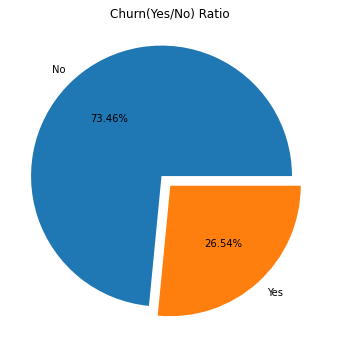

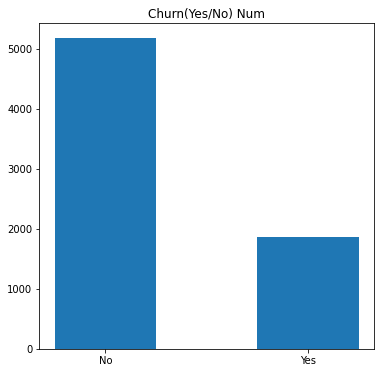

In [9]:
# 客户流失占比饼状图

plt.rcParams['figure.figsize'] = 6, 6
# plt.rcParams['font.sans-serif'] = ['Source Han Sans CN']
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts(
).index, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Churn(Yes/No) Ratio')
plt.show()

# 客户流失柱状图数量对比

churnDf = df['Churn'].value_counts().to_frame()
x = churnDf.index
y = churnDf['Churn']
plt.bar(x, y, width=0.5)
plt.title('Churn(Yes/No) Num')
plt.show()

## 根据用户基本信息进行分析

> 下面两图为不同性别和年龄的情况下客户流失人数占比，可以看出男女人数几乎五五开，而老年人与年轻人比例约为1:6。

<ipython-input-10-3ff63f20f287>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


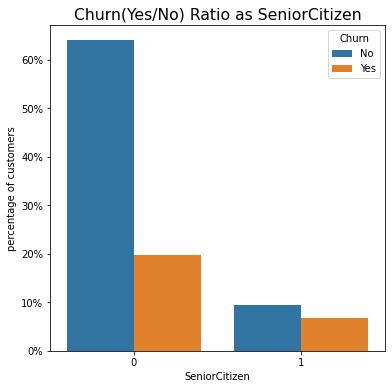

<ipython-input-10-3ff63f20f287>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


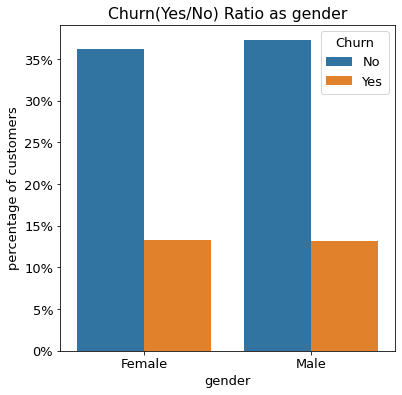

In [10]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):

    ratios = pd.DataFrame()
    g = (df.groupby(feature)["Churn"].value_counts()/len(df)).to_frame()
    g.rename(columns={"Churn": axis_name}, inplace=True)
    g.reset_index(inplace=True)

    if orient == 'v':
        ax = sns.barplot(x=feature, y=axis_name,
                         hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.rcParams.update({'font.size': 13})
    else:
        ax = sns.barplot(x=axis_name, y=feature,
                         hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    plt.show()


barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

> 下图为不同性别和年龄组合的流失率，无论男性还是女性，老年人的流失率都达到了40%+，几乎是年轻人的2倍。猜测老年人由于对电信服务需求不高或者不熟悉电子设备的操作等原因，相较年轻人更容易流失。

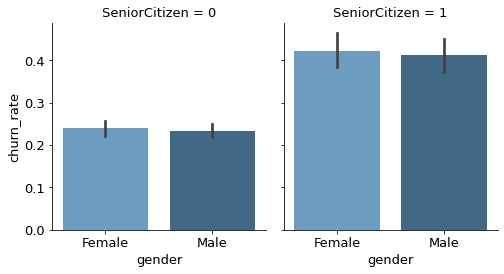

In [11]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate",
           palette="Blues_d", order=['Female', 'Male'])
plt.rcParams.update({'font.size': 13})
plt.show()

> 下图分别表示了有无伙伴、家属的客户人数分布及对应的流失率。由图可知，无伙伴、无家属的客户人数高达3000+，近总人数的一半，而且其流失也高达34%。这是一个值得注意的信号：虽然无伙伴、无家属的客户，其通话需求比较少，但由于这部分客户人数占比近50%，若能挖缺其潜在需求（如网络需求），并降低他们的流失率，则可有效降低运营商的成本。

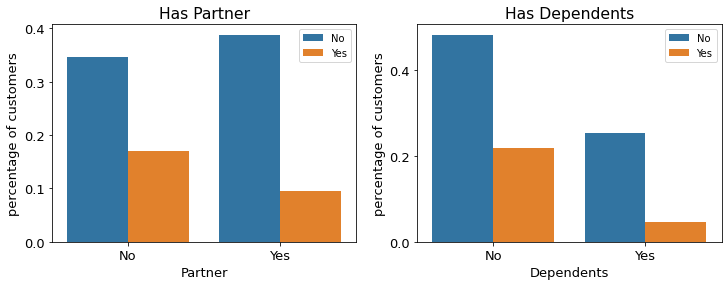

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(12, 4))
axis[0].set_title("Has Partner")
axis[1].set_title("Has Dependents")
axis_y = "percentage of customers"

# Plot Partner column
gp_partner = (df.groupby('Partner')["Churn"].value_counts()/len(df)).to_frame()
gp_partner.rename(columns={"Churn": axis_y}, inplace=True)
gp_partner.reset_index(inplace=True)
ax1 = sns.barplot(x='Partner', y=axis_y, hue='Churn',
                  data=gp_partner, ax=axis[0])
ax1.legend(fontsize=10)

# Plot Dependents column
gp_dep = (df.groupby('Dependents')["Churn"].value_counts()/len(df)).to_frame()
gp_dep.rename(columns={"Churn": axis_y}, inplace=True)
gp_dep.reset_index(inplace=True)

ax2 = sns.barplot(x='Dependents', y=axis_y,
                  hue='Churn', data=gp_dep, ax=axis[1])

# 设置字体大小
plt.rcParams.update({'font.size': 20})
ax2.legend(fontsize=10)

# 设置
plt.show()

> 下图表示流失率与在网时长的关系及趋势变化

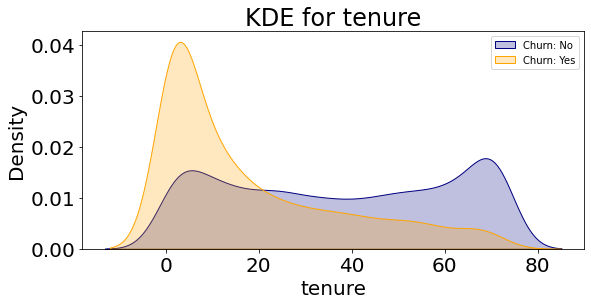

In [13]:
def kdeplot(feature, xlabel):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(),
                      color='navy', label='Churn: No', shade='True')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(
    ), color='orange', label='Churn: Yes', shade='True')
    plt.xlabel(xlabel)
    plt.rcParams.update({'font.size': 20})
    plt.legend(fontsize=10)


kdeplot('tenure', 'tenure')
plt.show()

### 小结

> 是否**老年人**、**有无伙伴**、**有无亲属**对客户的流失率有巨大的影响。此外，在网时长越久，流失率越低，符合一般经验。并且在网时长达到三个月，流失率小于在网率，也表明用户心理稳定期一般是三个月。

## 根据用户开通的服务信息进行分析

> 下图为开通多线服务与否的客户流失人数占比，可以看出是否开通对流失的影响不大。

<ipython-input-10-3ff63f20f287>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


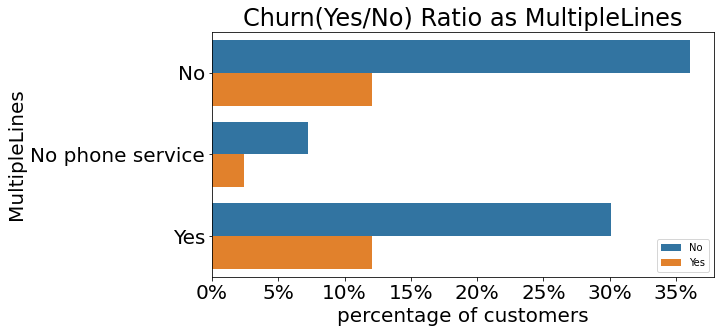

In [14]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

> 下图为开通网络不同服务的客户流失人数占比，由图可知光纤用户流失率最高。

<ipython-input-10-3ff63f20f287>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


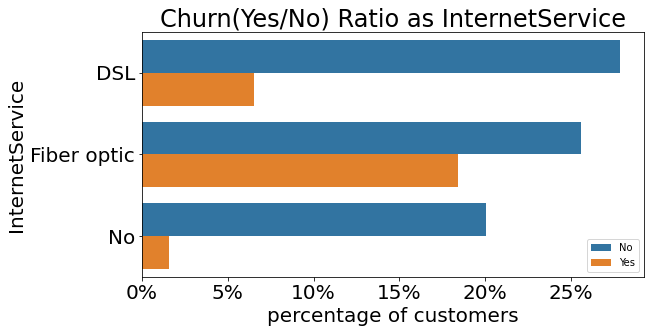

In [15]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

> 下图表示同时选择网络服务与是否选择其他服务的客户人数对比

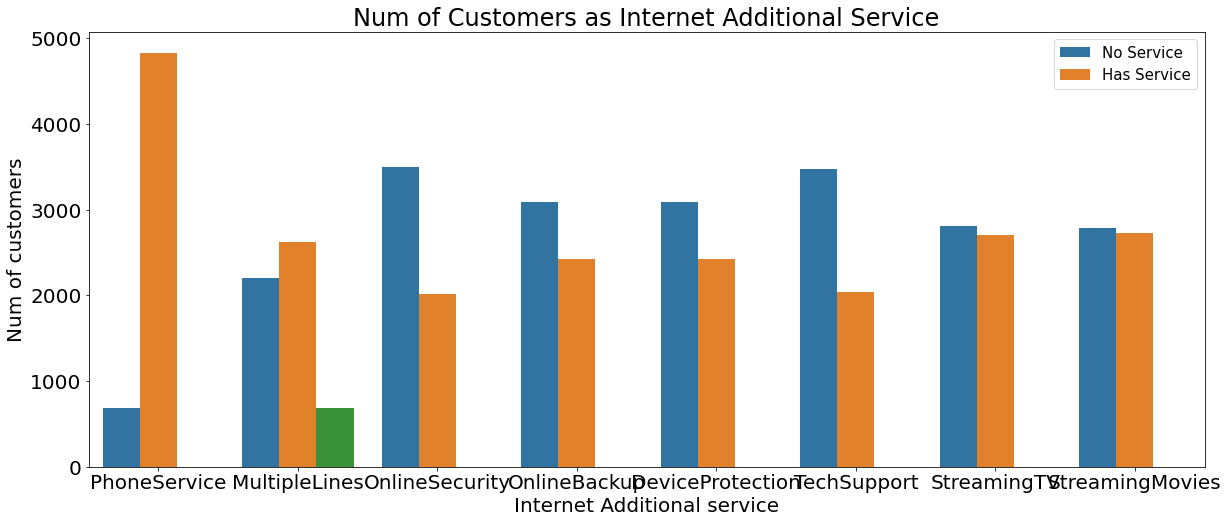

In [16]:
cols = ["PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
        "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols])
df1.rename(columns={'value': 'Has service'}, inplace=True)
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Internet Additional service', ylabel='Num of customers')
plt.rcParams.update({'font.size': 20})
plt.legend(labels=['No Service', 'Has Service'], fontsize=15)
plt.title('Num of Customers as Internet Additional Service')
plt.show()

> 下图表示选择网络服务的同时选择了别的服务的客户流失人数占比

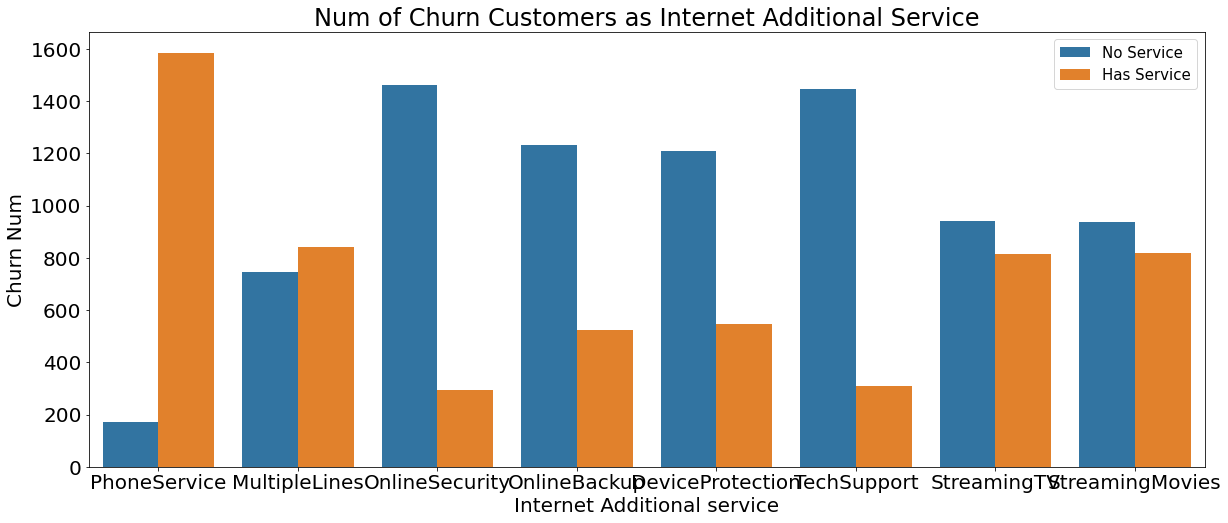

In [17]:
plt.figure(figsize=(20, 8))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols])
df1.rename(columns={'value': 'Has service'}, inplace=True)
ax = sns.countplot(data=df1, x='variable',
                   hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Internet Additional service', ylabel='Churn Num')
plt.rcParams.update({'font.size': 20})
plt.legend(labels=['No Service', 'Has Service'], fontsize=15)
plt.title('Num of Churn Customers as Internet Additional Service')
plt.show()

### 小结

> **电话服务**整体对用户流失影响较小。**单光纤用户**的流失占比较高。光纤用户绑定了**安全了**、**备份**、**保护**、**技术支持**服务的流失率较低。光纤用户附加**流媒体电视**、**电影服务**的流失率占比较高。

## 根据用户的付费信息进行分析

> 下图表示不同的付款方式下客户的流失率对比

<ipython-input-10-3ff63f20f287>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


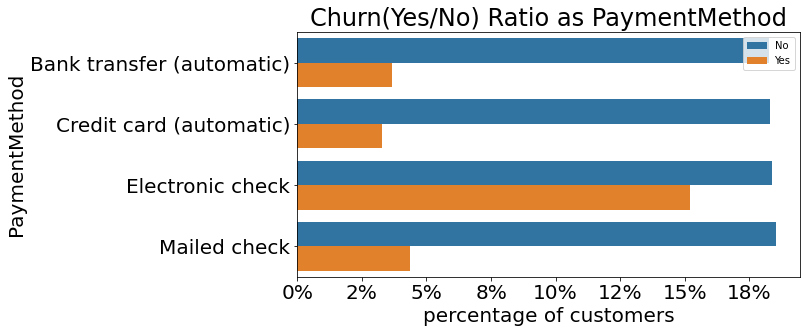

In [18]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

> 下图表示纸质化账单与合同期组合的情况下客户的流失率对比

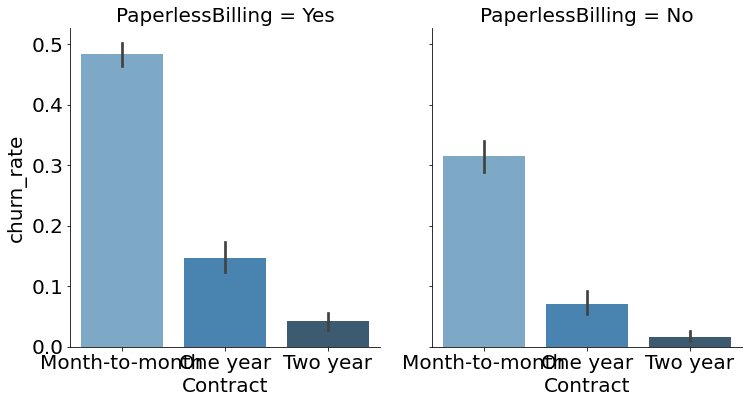

In [19]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=6, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette="Blues_d",
           order=['Month-to-month', 'One year', 'Two year'])
plt.rcParams.update({'font.size': 18})
plt.show()

> 下图表示流失率与月消费额和总消费额的关系及趋势变化

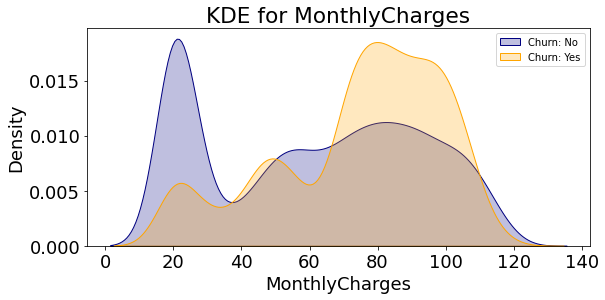

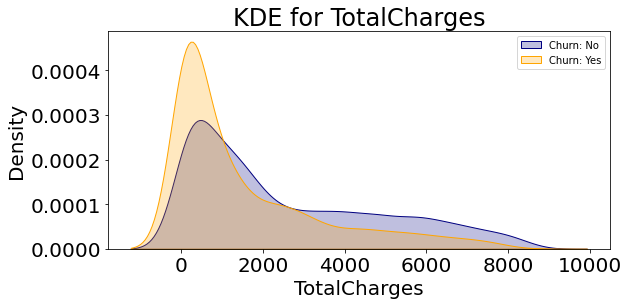

In [20]:
kdeplot('MonthlyCharges', 'MonthlyCharges')
kdeplot('TotalCharges', 'TotalCharges')
plt.show()

### 小结

> 采用**电子支票**支付的用户流失率最高，推测该方式的使用体验较为一般。**签订合同方式**对客户流失率影响为：按月签订 > 按一年签订 > 按两年签订，证明长期合同最能保留客户。**月消费额**大约在70-110之间用户流失率较高。长期来看，用户总消费越高，流失率越低，符合一般经验。

# 用户流失预测

> 对数据集进一步清洗和提取特征，通过特征选取对数据进行降维，采用机器学习模型应用于测试数据集，然后对构建的分类模型准确性进行分析。

## 数据清洗

> 观察数据类型，发现大多除了**tenure**、**MonthlyCharges**、**TotalCharges**是连续特征，其它都是离散特征。对于连续特征，采用标准化方式处理。对于离散特征，特征之间没有大小关系，采用**one-hot编码**；特征之间有大小关联，则采用数值映射。

In [21]:
customerID = df['customerID']
df.drop(['customerID'], axis=1, inplace=True)

In [22]:
# 获取离散特征

cateCols = [c for c in df.columns if df[c].dtype == 'object' or c == 'SeniorCitizen']
dfCate = df[cateCols].copy()
dfCate.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [23]:
# 进行特征编码

for col in cateCols:
    if dfCate[col].nunique() == 2:
        dfCate[col] = pd.factorize(dfCate[col])[0]
    else:
        dfCate = pd.get_dummies(dfCate, columns=[col])
dfCate['tenure'] = df[['tenure']]
dfCate['MonthlyCharges'] = df[['MonthlyCharges']]
dfCate['TotalCharges'] = df[['TotalCharges']]

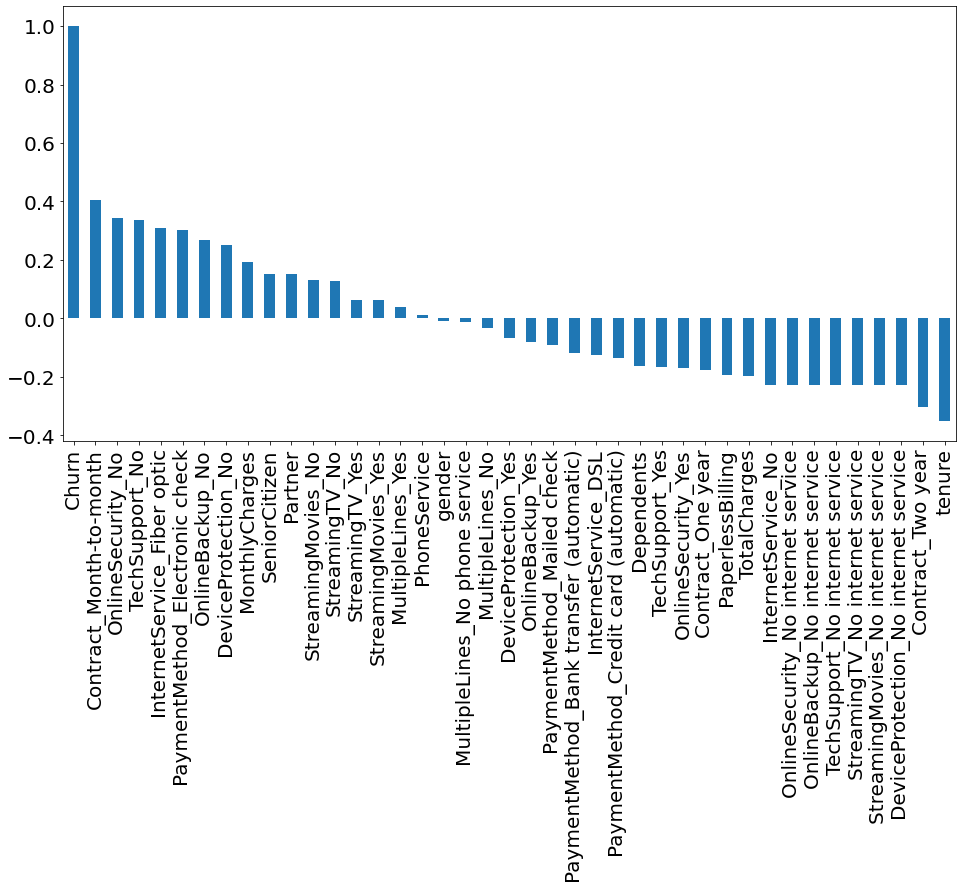

In [24]:
# 查看关联性

plt.figure(figsize=(16, 8))
dfCate.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

## 特征选取

In [25]:
# 特征选择
dropFea = ['gender', 'PhoneService',
           'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
           'DeviceProtection_No internet service', 'TechSupport_No internet service',
           'StreamingTV_No internet service', 'StreamingMovies_No internet service',
           #'OnlineSecurity_No', 'OnlineBackup_No',
           # 'DeviceProtection_No','TechSupport_No',
           #'StreamingTV_No', 'StreamingMovies_No',
           ]
dfCate.drop(dropFea, inplace=True, axis=1)
# 最后一列是作为标识
target = dfCate['Churn'].values
# 列表：特征和1个标识
columns = dfCate.columns.tolist()

In [26]:
# 构造训练数据集和测试数据集。

# 列表：特征
from sklearn.model_selection import train_test_split
columns.remove('Churn')
# 含有特征的DataFrame
features = dfCate[columns].values
# 30% 作为测试集，其余作为训练集
# random_state = 1表示重复试验随机得到的数据集始终不变
# stratify = target 表示按标识的类别，作为训练数据集、测试数据集内部的分配比例
train_x, test_x, train_y, test_y = train_test_split(
    features, target, test_size=0.30, stratify=target, random_state=1)

## 构建模型

In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 构造各种分类器
classifiers = [
    SVC(random_state=1, kernel='rbf'),
    DecisionTreeClassifier(random_state=1, criterion='gini'),
    RandomForestClassifier(random_state=1, criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
    AdaBoostClassifier(random_state=1),
]
# 分类器名称
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
    'adaboostclassifier',
]
# 分类器参数
# 注意分类器的参数，字典键的格式，GridSearchCV对调优的参数格式是"分类器名"+"__"+"参数名"
classifier_param_grid = [
    {'svc__C': [0.1], 'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth': [6, 9, 11]},
    {'randomforestclassifier__n_estimators': range(1, 11)},
    {'kneighborsclassifier__n_neighbors': [4, 6, 8]},
    {'adaboostclassifier__n_estimators': [70, 80, 90]}
]

## 模型参数评估和调优

In [28]:
# 对具体的分类器进行 GridSearchCV 参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score='accuracy_score'):
    response = {}
    gridsearch = GridSearchCV(
        estimator=pipeline, param_grid=param_grid, cv=3, scoring=score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch 最优参数：", search.best_params_)
    print("GridSearch 最优分数： %0.4lf" % search.best_score_)
    # 采用predict函数（特征是测试数据集）来预测标识，预测使用的参数是上一步得到的最优参数
    predict_y = gridsearch.predict(test_x)
    print(" 准确率 %0.4lf" % accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response


for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    # 采用 StandardScaler 方法对数据规范化：均值为0，方差为1的正态分布
    pipeline = Pipeline([
        #('scaler', StandardScaler()),
        # ('pca',PCA),
        (model_name, model)
    ])
    result = GridSearchCV_work(
        pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')

GridSearch 最优参数： {'svc__C': 0.1, 'svc__gamma': 0.01}
GridSearch 最优分数： 0.7560
 准确率 0.7591
GridSearch 最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch 最优分数： 0.7777
 准确率 0.7927
GridSearch 最优参数： {'randomforestclassifier__n_estimators': 10}
GridSearch 最优分数： 0.7700
 准确率 0.7804
GridSearch 最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch 最优分数： 0.7688
 准确率 0.7880
GridSearch 最优参数： {'adaboostclassifier__n_estimators': 70}
GridSearch 最优分数： 0.7998
 准确率 0.8050


## 实施和方案

> 由于没有预测数据集，选择最后10条为例进行预测

In [36]:
# 使用上述得到的最优模型
model = AdaBoostClassifier(n_estimators=70)
model.fit(train_x, train_y)

# 提取customerID
pred_id = customerID.tail(10)
# 提取预测数据集特征（如果有预测数据集，可以一并进行数据清洗和特征提取）
pred_x = dfCate.drop(['Churn'], axis=1).tail(10)

# 预测值
pred_y = model.predict(pred_x)

# 预测结果及对比
predDf = pd.DataFrame({'customerID': pred_id, 'Churn_pred': pred_y, 
                       'Churn': df.tail(10)['Churn'].map({'No':0, 'Yes':1})})
print(predDf)

      customerID  Churn_pred  Churn
7033  9767-FFLEM           0      0
7034  0639-TSIQW           0      1
7035  8456-QDAVC           0      0
7036  7750-EYXWZ           0      0
7037  2569-WGERO           0      0
7038  6840-RESVB           0      0
7039  2234-XADUH           0      0
7040  4801-JZAZL           0      0
7041  8361-LTMKD           1      1
7042  3186-AJIEK           0      0


# 结论和建议

> 根据以上分析，得到高流失率用户的特征：
>
>- **用户属性**：老年用户，未婚用户，无亲属用户更容易流失；
>- **服务属性**：在网时长小于半年，有电话服务，光纤用户/光纤用户附加流媒体电视、电影服务，无互联网增值服务；
>- **合同属性**：签订的合同期较短，采用电子支票支付，是电子账单，月租费约70-110元的客户容易流失；
>- 其它属性对用户流失影响较小，以上特征保持独立。


> 针对上述结论，从业务角度给出相应建议：
> 
>- 根据预测模型，构建一个高流失率的用户列表。通过用户调研推出一个最小可行化产品功能，并邀请种子用户进行试用。
>- **用户方面**：针对老年用户、无亲属、无伴侣用户的特征退出定制服务如亲属套餐、温暖套餐等，一方面加强与其它用户关联度，另一方对特定用户提供个性化服务。
>- **服务方面**：针对新注册用户，推送半年优惠如赠送消费券，以渡过用户流失高峰期。针对光纤用户和附加流媒体电视、电影服务用户，重点在于提升网络体验、增值服务体验，一方面推动技术部门提升网络指标，另一方面对用户承诺免费网络升级和赠送电视、电影等包月服务以提升用户黏性。针对在线安全、在线备份、设备保护、技术支持等增值服务，应重点对用户进行推广介绍，如首月/半年免费体验。
>- **合同方面**：针对单月合同用户，建议推出年合同付费折扣活动，将月合同用户转化为年合同用户，提高用户在网时长，以达到更高的用户留存。 针对采用电子支票支付用户，建议定向推送其它支付方式的优惠券，引导用户改变支付方式。